In [1]:

import cv2
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np
import pydicom
from IPython.display import update_display
PATH = "/mnt/d/Datasets/Vindr-Mammo/vindr-mammo-a-large-scale-benchmark-dataset-for-computer-aided-detection-and-diagnosis-in-full-field-digital-mammography-1.0.0/"
imgPATH = PATH + "images/"
ROI_PATH = PATH + 'ROI/'
benign_roi_path = PATH + "ROI/benign/"
malignant_roi_path = PATH + "ROI/malignant/"
fullimg_benign_path = PATH + "fullimg/benign/"
fullimg_malignant_path = PATH + "fullimg/malignant/"
image_size=300
output_size=300
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [2]:
csvdata = pd.read_csv(PATH + str("finding_annotations.csv"))

In [3]:
category = csvdata.finding_birads.to_numpy()
img_path = csvdata.image_id.to_numpy()
mask_x_min = csvdata.xmin.to_numpy()
mask_y_min = csvdata.ymin.to_numpy()
mask_x_max = csvdata.xmax.to_numpy()
mask_y_max = csvdata.ymax.to_numpy()
view = csvdata.view_position.to_numpy()
side = csvdata.laterality.to_numpy()
filename = csvdata.study_id.to_numpy()
tran_test_split = csvdata.split.to_numpy()
height = csvdata.height.to_numpy()
width = csvdata.width.to_numpy()

In [4]:
category[0].split(" ")[1] == '4'

True

In [5]:
def ROI(image_path,img_h,img_w,xmin,xmax,ymin,ymax,save_path,size):
    data = pydicom.dcmread(image_path).pixel_array
    data = cv2.medianBlur(data,3)
    data = clahe.apply(data)
    if xmin<0: xmin=0
    if xmax>img_w: xmax=img_w
    if ymin<0: ymin=0
    if ymax>img_h: ymax=img_h
    data = data[int(ymin):int(ymax),int(xmin):int(xmax)]
    data = cv2.resize(data,(size,size))
    cv2.imwrite(save_path,data)

In [6]:
len(category)

20486

In [7]:
Progress_display = display("0% completed",display_id="Progress_display")
for i,x in enumerate(category):
    if str(x) != "nan":
        image_path=str(imgPATH+filename[i]+'/'+img_path[i]+".dicom")
        save_path = filename[i] + "_" + view[i] + "_" + side[i] + ".png"
        if x.split(" ")[1] == '3':
            if tran_test_split[i] =='training':
                ROI(image_path,height[i],width[i],mask_x_min[i],mask_x_max[i],mask_y_min[i],mask_y_max[i],str(ROI_PATH+"train/benign/"+save_path),300)
            elif tran_test_split[i] =='test':
                ROI(image_path,height[i],width[i],mask_x_min[i],mask_x_max[i],mask_y_min[i],mask_y_max[i],str(ROI_PATH+"test/benign/"+save_path),300)
            else:
                print("Error occured with image "+str(img_path[i]))
        elif x.split(" ")[1] == '4' or x.split(" ")[1] =='5':
            if tran_test_split[i] =='training':
                ROI(image_path,height[i],width[i],mask_x_min[i],mask_x_max[i],mask_y_min[i],mask_y_max[i],str(ROI_PATH+"train/malignant/"+save_path),300)
            elif tran_test_split[i] =='test':
                ROI(image_path,height[i],width[i],mask_x_min[i],mask_x_max[i],mask_y_min[i],mask_y_max[i],str(ROI_PATH+"test/malignant/"+save_path),300)
            else:
                print("Error occured with image "+str(img_path[i])) 
        else:
            print("Error occured with image "+str(img_path[i]))
    update_display(str(int(i/len(category)*100))+"% completed",display_id="Progress_display")
print("Completed!")
    

'2% completed'

In [61]:
print('..',end='\r')
print('...',end='\r')

(3518, 2800)


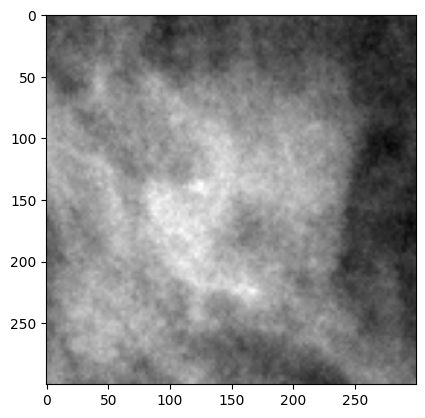

In [48]:
dicom = pydicom.dcmread(imgPATH+filename[0]+'/'+img_path[0]+".dicom").pixel_array
print(dicom.shape)
dicom = dicom[int(mask_y_min[0]):int(mask_y_max[0]),int(mask_x_min[0]):int(mask_x_max[0])]
dicom = cv2.resize(dicom,(300,300))
plt.imshow(dicom, cmap="gray")